In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import zipfile
with zipfile.ZipFile('Val_Label.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
from imutils import paths
from tqdm import tqdm
import numpy as np

import cv2
import matplotlib.pyplot as plt
#from scipy.misc.pilutil import imread
import shutil
import os
import numpy as np
import json
import pandas as pd
import pprint
import tensorflow as tf
import time
from tensorflow import keras
from keras.layers import *
from keras.preprocessing import image

from glob import glob
import sys
import random

#matplotlib.use('agg')
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers import UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from PIL import Image

from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

import cv2
import gc
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
# Load the TensorBoard notebook extension
from keras.callbacks import TensorBoard
%load_ext tensorboard
import tensorflow as tf
import datetime, os
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [16]:
%cd /content/drive/My Drive/IDD

/content/drive/My Drive/IDD


In [9]:
from imutils import paths
from tqdm import tqdm
labels_path = paths.list_images("Val_Label")
#print((labels_path))
labels_path = sorted(labels_path)


import cv2
from keras.utils.np_utils import to_categorical
import numpy as np
colors = np.array([
    [0,1,0,0,0,0,0,0],      
    [0,0,1,0,0,0,0,0],    
    [0,0,0,1,0,0,0,0],      
    [0,0,0,0,1,0,0,0],        
    [0,0,0,0,0,1,0,0],     
    [0,0,0,0,0,0,1,0],      
    [0,0,0,0,0,0,0,1],     
    [1,0,0,0,0,0,0,0]           
], dtype=np.int)

image_y_cv = []
for name in tqdm(labels_path):
  image = cv2.imread(name)
  image = cv2.resize(image, (512, 512))
  r,g,b =cv2.split(image)
  color_image = np.zeros(
        (r.shape[0], r.shape[1], 8), dtype=np.int)
  for i in range(8):
    color_image[r == i] = colors[i]
  image_y_cv.append(color_image)

from imutils import paths
x_path = paths.list_images("leftImg8bit/val")
x_path = sorted(x_path)

import cv2
image_cv = []
for name in tqdm(x_path):
  image = cv2.imread(name)
  image_cv.append(cv2.resize(image, (512, 512))/255)

import numpy as np
image_cv = np.array(image_cv)
image_y_cv = np.array(image_y_cv)
image_y_cv.shape,image_cv.shape

  



100%|██████████| 1055/1055 [00:56<00:00, 18.68it/s]


((1055, 512, 512, 8), (1055, 512, 512, 3))

In [2]:
'''from imutils import paths
x_path_val = paths.list_images("leftImg8bit/val")
x_path_val = sorted(x_path_val)
x_path_val[:5]
from imutils import paths
labels_path_val = paths.list_images("Val_Label")
labels_path_val = sorted(labels_path_val)
#labels_path = labels_path[:2001]
labels_path_val[:5],x_path_val[:5],len(labels_path_val),len(x_path_val)'''

(['Val_Label/.ipynb_checkpoints/205_frame0671_gtFine_polygons-checkpoint.png',
  'Val_Label/205_frame0340_gtFine_polygons.png',
  'Val_Label/205_frame0671_gtFine_polygons.png',
  'Val_Label/205_frame0821_gtFine_polygons.png',
  'Val_Label/205_frame1047_gtFine_polygons.png'],
 ['leftImg8bit/val/205/frame0340_leftImg8bit.jpg',
  'leftImg8bit/val/205/frame0671_leftImg8bit.jpg',
  'leftImg8bit/val/205/frame0821_leftImg8bit.jpg',
  'leftImg8bit/val/205/frame1047_leftImg8bit.jpg',
  'leftImg8bit/val/205/frame1347_leftImg8bit.jpg'],
 1056,
 1055)

In [ ]:
'''import cv2
import gc
import numpy as np
from tqdm import tqdm
colors = np.array([
    [0,1,0,0,0,0,0,0],      
    [0,0,1,0,0,0,0,0],     
    [0,0,0,1,0,0,0,0],      
    [0,0,0,0,1,0,0,0],        
    [0,0,0,0,0,1,0,0],    
    [0,0,0,0,0,0,1,0],      
    [0,0,0,0,0,0,0,1],     
    [1,0,0,0,0,0,0,0]           
], dtype=np.int)
#global block_val
block_val = 0
def train_label_val():
    """ Since val data doesn't fit on RAM.Than we would create a pipeline so that we pass a part of data for validation and fit it on RAM"""
  global block_val
  image_y_val = []
  if block_val + 200 <= 1055:
    for name in tqdm(labels_path_val[block_val:block_val + 200]):
      image = cv2.imread(name)
      image = cv2.resize(image, (512, 512))
      r,g,b =cv2.split(image)
      color_image = np.zeros(
        (r.shape[0], r.shape[1], 8), dtype=np.int)
      for i in range(8):
        color_image[r == i] = colors[i]

      image_y_val.append(color_image)
    block_val = block_val + 200
  elif block_val < 1055:
      for name in labels_path_val[block_val:]:
        image = cv2.imread(name)
        image = cv2.resize(image, (512, 512))
        r,g,b =cv2.split(image)
        color_image = np.zeros((r.shape[0], r.shape[1], 8), dtype=np.int)
        for i in range(8):
          color_image[r == i] = colors[i]
        image_y_val.append(color_image)
      block_val = 0
  else:
    block_val = 0
    for name in tqdm(labels_path_val[block_val:block_val + 200]):
      image = cv2.imread(name)
      image = cv2.resize(image, (512, 512))
      r,g,b =cv2.split(image)
      color_image = np.zeros((r.shape[0], r.shape[1], 8), dtype=np.int)
      for i in range(8):
        color_image[r == i] = colors[i]
      image_y_val.append(color_image)
    block_val = block_val + 200
  image_y_val = np.array(image_y_val)
  collected = gc.collect()  
  print("Garbage collector: collected", 
          "%d objects." % collected)
  return image_y_val
'''


  


In [ ]:
"""import cv2
block_1_val = 0
def train_val():
    ''' Since validation data doesn't fit on RAM.Than we would create a pipeline so that we pass a part of data for validation and fit it on RAM'''
  collected = gc.collect()
  print("Garbage collector: collected","%d objects." % collected) 
  global block_1_val
  image_tr_val = []
  if block_1_val + 200 <= 1055:
    for name in tqdm(x_path[block_1_val:block_1_val + 200]):
      image = cv2.imread(name)
      img = cv2.resize(image, (512, 512))
      img = np.float32(img)  / 255 
      image_tr_val.append(img)
    block_1_val = block_1_val + 200
  elif block_1_val < 1055:
    for name in tqdm(x_path[block_1_val:]):
      image = cv2.imread(name)
      img = cv2.resize(image, (512, 512))
      img = np.float32(img)  / 255 
      image_tr_val.append(img)
    block_1_val = 0
  else:
    block_1_val = 0
    for name in tqdm(x_path[block_1_val:block_1_val + 200]):
      image = cv2.imread(name)
      img = cv2.resize(image, (512, 512))
      img = np.float32(img)  / 255
      image_tr_val.append(img)
    block_1_val = block_1_val + 200
  image_tr_val = np.array(image_tr_val)
  return image_tr_val 
"""




In [10]:
from imutils import paths
x_path = paths.list_images("leftImg8bit/train")
x_path = sorted(x_path)
x_path[:5]
from imutils import paths
labels_path = paths.list_images("Train_Label")
labels_path = sorted(labels_path)
#labels_path = labels_path[:2001]
labels_path[:5],x_path[:5],len(labels_path),len(x_path)

(['Train_Label/201_frame0029_gtFine_polygons.png',
  'Train_Label/201_frame0299_gtFine_polygons.png',
  'Train_Label/201_frame0779_gtFine_polygons.png',
  'Train_Label/201_frame1019_gtFine_polygons.png',
  'Train_Label/201_frame1469_gtFine_polygons.png'],
 ['leftImg8bit/train/201/frame0029_leftImg8bit.jpg',
  'leftImg8bit/train/201/frame0299_leftImg8bit.jpg',
  'leftImg8bit/train/201/frame0779_leftImg8bit.jpg',
  'leftImg8bit/train/201/frame1019_leftImg8bit.jpg',
  'leftImg8bit/train/201/frame1469_leftImg8bit.jpg'],
 7034,
 7034)

In [11]:
import cv2
import gc
import numpy as np
from tqdm import tqdm
colors = np.array([
    [0,1,0,0,0,0,0,0],      
    [0,0,1,0,0,0,0,0],     
    [0,0,0,1,0,0,0,0],      
    [0,0,0,0,1,0,0,0],        
    [0,0,0,0,0,1,0,0],    
    [0,0,0,0,0,0,1,0],      
    [0,0,0,0,0,0,0,1],     
    [1,0,0,0,0,0,0,0]           
], dtype=np.int)
#global block
block = 0
def train_label():
    ''' Since train data doesn't fit on RAM.Than we would create a pipeline so that we pass a part of data for training and fit it on RAM'''
  global block
  image_y = []
  if block + 200 <= 7034:
    for name in tqdm(labels_path[block:block + 200]):
      image = cv2.imread(name)
      image = cv2.resize(image, (512, 512))
      r,g,b =cv2.split(image)
      color_image = np.zeros(
        (r.shape[0], r.shape[1], 8), dtype=np.int)
      for i in range(8):
        color_image[r == i] = colors[i]

      image_y.append(color_image)
    block = block + 200
  elif block < 7034:
      for name in labels_path[block:]:
        image = cv2.imread(name)
        image = cv2.resize(image, (512, 512))
        r,g,b =cv2.split(image)
        color_image = np.zeros((r.shape[0], r.shape[1], 8), dtype=np.int)
        for i in range(8):
          color_image[r == i] = colors[i]
        image_y.append(color_image)
      block = 0
  else:
    block = 0
    for name in tqdm(labels_path[block:block + 200]):
      image = cv2.imread(name)
      image = cv2.resize(image, (512, 512))
      r,g,b =cv2.split(image)
      color_image = np.zeros((r.shape[0], r.shape[1], 8), dtype=np.int)
      for i in range(8):
        color_image[r == i] = colors[i]
      image_y.append(color_image)
    block = block + 200
  image_y = np.array(image_y)
  collected = gc.collect()  
  print("Garbage collector: collected", 
          "%d objects." % collected)
  return image_y


  


In [12]:
import cv2
block_1 = 0
def train():
    ''' Since train data doesn't fit on RAM.Than we would create a pipeline so that we pass a part of data for training and fit it on RAM'''
  collected = gc.collect()
  print("Garbage collector: collected","%d objects." % collected) 
  global block_1
  image_tr = []
  if block_1 + 200 <= 7034:
    for name in tqdm(x_path[block_1:block_1 + 200]):
      image = cv2.imread(name)
      img = cv2.resize(image, (512, 512))
      img = np.float32(img)  / 255 
      image_tr.append(img)
    block_1 = block_1 + 200
  elif block_1 < 7034:
    for name in tqdm(x_path[block_1:]):
      image = cv2.imread(name)
      img = cv2.resize(image, (512, 512))
      img = np.float32(img)  / 255 
      image_tr.append(img)
    block_1 = 0
  else:
    block_1 = 0
    for name in tqdm(x_path[block_1:block_1 + 200]):
      image = cv2.imread(name)
      img = cv2.resize(image, (512, 512))
      img = np.float32(img)  / 255
      image_tr.append(img)
    block_1 = block_1 + 200
  image_tr = np.array(image_tr)
  return image_tr 





In [13]:
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.layers import UpSampling2D, Dropout, BatchNormalization,GlobalAveragePooling2D,Reshape,Concatenate,AveragePooling2D,Multiply,GlobalMaxPooling2D,concatenate

#Input 
inputs = Input((512,512,3))

#Layer before C1
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
n1 = BatchNormalization()(conv1) 
n1 = Activation('relu')(n1)
x1 = MaxPooling2D((2,2), strides = (2,2))(n1)
print(x1.shape)






(None, 256, 256, 64)


In [14]:
#C1 Layer 
conv2 = Conv2D(8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x1)
n2 = BatchNormalization()(conv2) 
n2 = Activation('relu')(n2)
conv2 = Conv2D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',strides=(2, 2))(n2)
n2 = BatchNormalization()(conv2) 
n2 = Activation('relu')(n2)
conv3 = Conv2D(8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n2)
n2 = BatchNormalization()(conv3) 

conv3 = Conv2D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',strides=(2, 2))(x1)
n3 = BatchNormalization()(conv3) 
n3 = Activation('relu')(n3)

y1 = Add()([n2,n3])
y1 = Activation('relu')(y1)
print(y1.shape)

(None, 128, 128, 8)


In [15]:
#C2 Layer 
conv3 = Conv2D(16, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y1)
n3 = BatchNormalization()(conv3) 
n3 = Activation('relu')(n3)
conv3 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',strides=(2, 2))(n3)
n3 = BatchNormalization()(conv3) 
n3 = Activation('relu')(n3)
conv4 = Conv2D(16, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n3)
n3 = BatchNormalization()(conv4) 

conv4 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',strides=(2, 2))(y1)
n4 = BatchNormalization()(conv4) 
n4 = Activation('relu')(n4)

y2 = Add()([n3,n4])
y2 = Activation('relu')(y2)
print(y2.shape)

(None, 64, 64, 16)


In [16]:
#C3 Layer 
conv4 = Conv2D(32, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y2)
n4 = BatchNormalization()(conv4) 
n4 = Activation('relu')(n4)
conv4 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n4)
n4 = BatchNormalization()(conv4) 
n4 = Activation('relu')(n4)
conv5 = Conv2D(32, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n4)
n4 = BatchNormalization()(conv5) 

conv5 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y2)
n5 = BatchNormalization()(conv5) 
n5 = Activation('relu')(n5)

y3 = Add()([n4,n5])
y3 = Activation('relu')(y3)
print(y3.shape)

(None, 64, 64, 32)


In [17]:
#C4 Layer 
conv5 = Conv2D(64, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y3)
n5 = BatchNormalization()(conv5) 
n5 = Activation('relu')(n5)
conv5 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n5)
n5 = BatchNormalization()(conv5) 
n5 = Activation('relu')(n5)
conv6 = Conv2D(64, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n5)
n5 = BatchNormalization()(conv6) 

conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y3)
n6 = BatchNormalization()(conv6) 
n6 = Activation('relu')(n6)

y4 = Add()([n5,n6])
y4 = Activation('relu')(y4)
print(y4.shape)

(None, 64, 64, 64)


In [18]:
#Global flow
y5 = GlobalAveragePooling2D()(y4)
print(y5.shape)
y5 = BatchNormalization()(y5) 
y5 = Activation('relu')(y5)
y5 = Reshape(( 1,1,64))(y5)
print(y5.shape)

conv7 = Conv2D(64, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y5)
y5 = UpSampling2D(size=(64, 64), interpolation='bilinear')(conv7)
print(y5.shape)



(None, 64)
(None, 1, 1, 64)
(None, 64, 64, 64)


In [19]:
#Context Flow 1

#CONTEXT FUSION MODULE
y6 = Concatenate(axis = 3)([y5,y4])
print(y6.shape)
n6 = AveragePooling2D(pool_size=(2, 2))(y6)
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n6)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

#CONTEXT REFINEMENT MODULE
conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
y7 = Activation('relu')(conv10)
conv11 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y7)
y7 = Activation('sigmoid')(conv11)

y8 = Multiply()([conv9,y7])
y8 = Add()([y8,conv9])
y8 = UpSampling2D(size=(2, 2), interpolation='bilinear')(y8)
print(y8.shape)


(None, 64, 64, 128)
(None, 64, 64, 64)


In [20]:
#Context Flow 2

#CONTEXT FUSION MODULE
y9 = Concatenate(axis = 3)([y8,y4])
print(y9.shape)
n7 = AveragePooling2D(pool_size=(2, 2))(y9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n7)
conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

#CONTEXT REFINEMENT MODULE
conv11 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv10)
y8_ = Activation('relu')(conv10)
conv12 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y8_)
y8_ = Activation('sigmoid')(conv12)

y9 = Multiply()([conv10,y8_])
y9 = Add()([y9,conv10])
y9 = UpSampling2D(size=(2, 2), interpolation='bilinear')(y9)
print(y9.shape)


(None, 64, 64, 128)
(None, 64, 64, 64)


In [21]:
#Context Flow 3

#CONTEXT FUSION MODULE
y10 = Concatenate(axis = 3)([y9,y4])
print(y10.shape)
n8 = AveragePooling2D(pool_size=(2, 2))(y10)
conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(n8)
conv11 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv10)

#CONTEXT REFINEMENT MODULE
conv12 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv11)
y9_ = Activation('relu')(conv12)
conv13 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y9_)
y9_ = Activation('sigmoid')(conv13)

y10 = Multiply()([conv11,y9_])
y10 = Add()([y10,conv11])
y10 = UpSampling2D(size=(2, 2), interpolation='bilinear')(y10)
print(y10.shape)


(None, 64, 64, 128)
(None, 64, 64, 64)


In [22]:
y11 = Add()([y10,y9,y8,y5])
print(y11.shape)

(None, 64, 64, 64)


In [23]:
#(S)Feature Selection Module (FSM)
conv14 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y11)
print(conv14.shape)
n9 = GlobalMaxPooling2D()(conv14)
print(n9.shape)
n9 = Reshape(( 1,1,64))(n9)
print(n9.shape)
n9 = BatchNormalization()(n9) 
n9 = Activation('sigmoid')(n9)
y12 = Multiply()([conv14,n9])
print(y12.shape)



(None, 64, 64, 64)
(None, 64)
(None, 1, 1, 64)
(None, 64, 64, 64)


In [24]:
#×2 up(Upsampling after FSM)
y13 = UpSampling2D(size=(2, 2), interpolation='bilinear')(y12)
print(y13.shape)

(None, 128, 128, 64)


In [25]:
#Adapted Global Convolutional Network (AGCN) (A) input = C1 outcome(y1)
print(y1.shape)
#LEFT LAYER
conv15  = Conv2D(8, (7,1), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y13)
conv15  = Conv2D(8, (1,7), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv15)
#RIGHT LAYER
conv16  = Conv2D(8, (1,7), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y13)
conv16 =  Conv2D(8, (7,1), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv16)
#COMBINE LEFT AND RIGHT
y14 = Add()([conv15,conv16])
conv17 =  Conv2D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y14)

y15 = Add()([y14,conv17])
print(y15.shape)


(None, 128, 128, 8)
(None, 128, 128, 8)


In [26]:
#concatinating both FSM and AGCN over the last axis
y16 = concatenate([y15,y13],axis = 3)
print(y16.shape)# 64 + 8 = 72
#Layers after concat
conv18 = Conv2D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(y16)
y17 = UpSampling2D(size=(4, 4), interpolation='bilinear')(conv18) # 128 * 4 = 512 =>Original image
y17 = Activation('softmax')(y17) #Since its multi class I use softmax
print(y17.shape) 




(None, 128, 128, 72)
(None, 512, 512, 8)


In [27]:
model = Model(input = inputs, output = y17)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 512, 512, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 512, 512, 64) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  """Entry point for launching an IPython kernel.


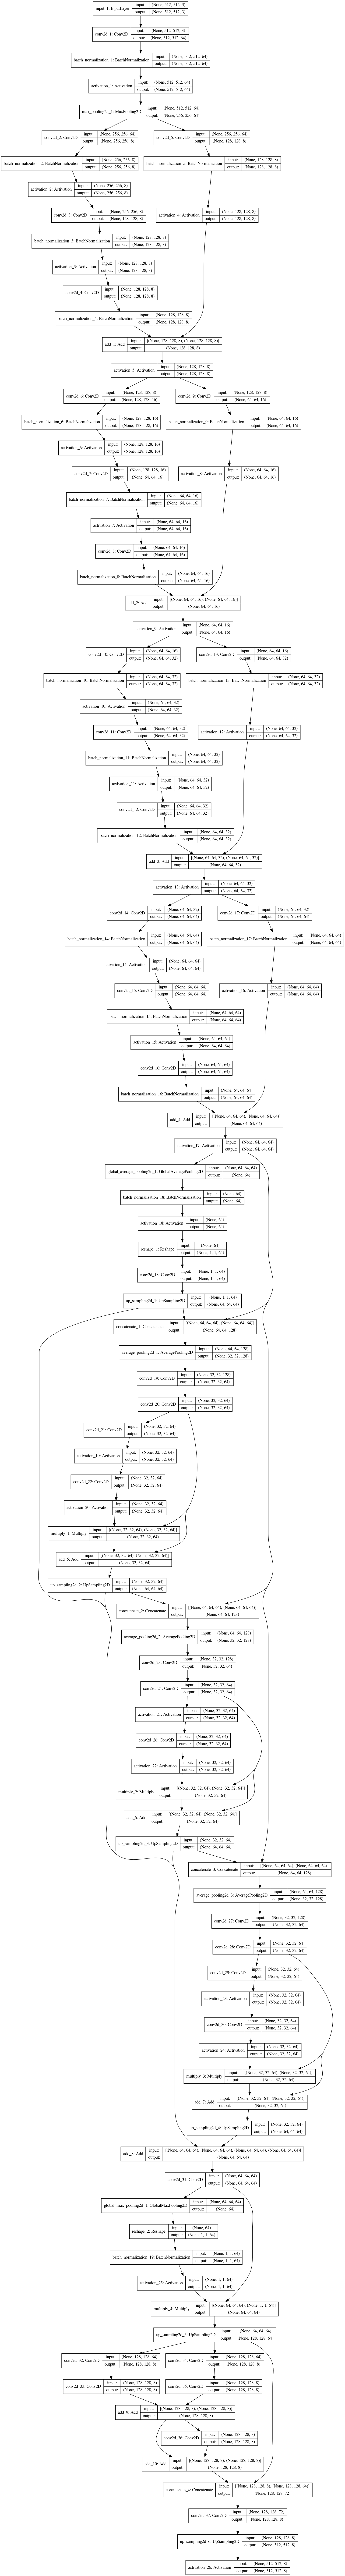

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Cnet.png', show_shapes=True, show_layer_names=True)

In [28]:
# Load the TensorBoard notebook extension
from keras.callbacks import TensorBoard
%load_ext tensorboard
import tensorflow as tf
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard("logs", histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [29]:
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau

earlyStopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
mcp_save = ModelCheckpoint('CANet.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')


In [30]:
def IoU(y_val, y_pred):
    class_iou = []
    n_classes = 8
    
    y_predi = np.argmax(y_pred, axis=3)
    y_truei = np.argmax(y_val, axis=3)
    
    for c in range(n_classes):
        TP = np.sum((y_truei == c) & (y_predi == c))
        FP = np.sum((y_truei != c) & (y_predi == c))
        FN = np.sum((y_truei == c) & (y_predi != c)) 
        IoU = TP / float(TP + FP + FN)
        if(float(TP + FP + FN) == 0):
          IoU=TP/0.001
        class_iou.append(IoU)
    MIoU=sum(class_iou)/n_classes
    return MIoU
def miou( y_true, y_pred ) :
    score = tf.py_function( lambda y_true, y_pred : IoU( y_true, y_pred).astype('float32'),
                        [y_true, y_pred],
                        'float32')
    return score

In [31]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',miou])

In [32]:
flag = 36
history_1 = []
while(flag):
  x  = train()  
  y = train_label()
  #x_val = train_val()
  #y_val = train_label_val()
  #image_y_cv.shape,image_cv.shape
  history = model.fit(x,y,batch_size=5,epochs = 3,callbacks=[earlyStopping, mcp_save,tensorboard_callback],validation_data=(image_cv,image_y_cv))
  history_1.append(history)
  flag = flag - 1



  1%|          | 2/200 [00:00<00:15, 12.62it/s]

Garbage collector: collected 30 objects.


100%|██████████| 200/200 [00:06<00:00, 28.97it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
 15/200 [=>............................] - ETA: 3:29 - loss: 4.7380 - accuracy: 0.1403 - miou: 0.0299

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


200/200 [==============================] - 265s 1s/step - loss: 1.9111 - accuracy: 0.5244 - miou: 0.1569 - val_loss: 1.4870 - val_accuracy: 0.5513 - val_miou: 0.1704
Epoch 2/3
200/200 [==============================] - 254s 1s/step - loss: 1.0488 - accuracy: 0.6876 - miou: 0.2331 - val_loss: 1.1409 - val_accuracy: 0.6475 - val_miou: 0.2217
Epoch 3/3
200/200 [==============================] - 258s 1s/step - loss: 0.8196 - accuracy: 0.7523 - miou: 0.2663 - val_loss: 1.0276 - val_accuracy: 0.6863 - val_miou: 0.2390


  0%|          | 1/200 [00:00<00:20,  9.73it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [00:07<00:00, 27.49it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 259s 1s/step - loss: 0.7793 - accuracy: 0.7550 - miou: 0.2753 - val_loss: 0.9699 - val_accuracy: 0.6848 - val_miou: 0.2430
Epoch 2/3
200/200 [==============================] - 250s 1s/step - loss: 0.7056 - accuracy: 0.7716 - miou: 0.2877 - val_loss: 1.0181 - val_accuracy: 0.6927 - val_miou: 0.2497
Epoch 3/3
200/200 [==============================] - 250s 1s/step - loss: 0.6558 - accuracy: 0.7840 - miou: 0.3021 - val_loss: 0.9781 - val_accuracy: 0.6999 - val_miou: 0.2577


  0%|          | 1/200 [00:00<00:22,  8.65it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 28.29it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 244s 1s/step - loss: 0.9561 - accuracy: 0.6698 - miou: 0.2819 - val_loss: 0.9778 - val_accuracy: 0.6843 - val_miou: 0.2585
Epoch 2/3
200/200 [==============================] - 244s 1s/step - loss: 0.8955 - accuracy: 0.6832 - miou: 0.2980 - val_loss: 0.9947 - val_accuracy: 0.6839 - val_miou: 0.2658
Epoch 3/3
200/200 [==============================] - 242s 1s/step - loss: 0.8598 - accuracy: 0.6980 - miou: 0.3098 - val_loss: 0.9562 - val_accuracy: 0.6937 - val_miou: 0.2731


  0%|          | 1/200 [00:00<00:20,  9.78it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [00:07<00:00, 27.97it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 244s 1s/step - loss: 0.8156 - accuracy: 0.7166 - miou: 0.3070 - val_loss: 0.9196 - val_accuracy: 0.6982 - val_miou: 0.2792
Epoch 2/3
200/200 [==============================] - 245s 1s/step - loss: 0.7555 - accuracy: 0.7323 - miou: 0.3187 - val_loss: 0.8827 - val_accuracy: 0.7058 - val_miou: 0.2917
Epoch 3/3
200/200 [==============================] - 249s 1s/step - loss: 0.7440 - accuracy: 0.7303 - miou: 0.3208 - val_loss: 0.8531 - val_accuracy: 0.7208 - val_miou: 0.2913


  1%|          | 2/200 [00:00<00:11, 17.62it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [00:07<00:00, 27.50it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 245s 1s/step - loss: 0.7153 - accuracy: 0.7668 - miou: 0.3049 - val_loss: 0.9324 - val_accuracy: 0.7011 - val_miou: 0.2634
Epoch 2/3
200/200 [==============================] - 241s 1s/step - loss: 0.6298 - accuracy: 0.7806 - miou: 0.3227 - val_loss: 0.9262 - val_accuracy: 0.7095 - val_miou: 0.2821
Epoch 3/3
200/200 [==============================] - 241s 1s/step - loss: 0.5986 - accuracy: 0.7879 - miou: 0.3389 - val_loss: 0.8756 - val_accuracy: 0.7143 - val_miou: 0.2842


  1%|          | 2/200 [00:00<00:16, 12.24it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:06<00:00, 29.30it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 239s 1s/step - loss: 0.6394 - accuracy: 0.7729 - miou: 0.3302 - val_loss: 0.8315 - val_accuracy: 0.7218 - val_miou: 0.2864
Epoch 2/3
200/200 [==============================] - 240s 1s/step - loss: 0.5799 - accuracy: 0.7922 - miou: 0.3547 - val_loss: 0.8362 - val_accuracy: 0.7283 - val_miou: 0.2992
Epoch 3/3
200/200 [==============================] - 243s 1s/step - loss: 0.5596 - accuracy: 0.7977 - miou: 0.3646 - val_loss: 0.8732 - val_accuracy: 0.7248 - val_miou: 0.3017


  0%|          | 1/200 [00:00<00:21,  9.35it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 26.60it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 247s 1s/step - loss: 0.5092 - accuracy: 0.8235 - miou: 0.3523 - val_loss: 0.8855 - val_accuracy: 0.7266 - val_miou: 0.2946
Epoch 2/3
200/200 [==============================] - 253s 1s/step - loss: 0.4705 - accuracy: 0.8366 - miou: 0.3765 - val_loss: 0.8746 - val_accuracy: 0.7312 - val_miou: 0.3050
Epoch 3/3
200/200 [==============================] - 247s 1s/step - loss: 0.4525 - accuracy: 0.8411 - miou: 0.3855 - val_loss: 0.9350 - val_accuracy: 0.7262 - val_miou: 0.2927


  1%|          | 2/200 [00:00<00:15, 12.56it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:09<00:00, 20.87it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 245s 1s/step - loss: 0.4472 - accuracy: 0.8467 - miou: 0.3583 - val_loss: 0.9758 - val_accuracy: 0.7143 - val_miou: 0.2832
Epoch 2/3
200/200 [==============================] - 248s 1s/step - loss: 0.3904 - accuracy: 0.8626 - miou: 0.3888 - val_loss: 0.9096 - val_accuracy: 0.7204 - val_miou: 0.2982
Epoch 3/3
200/200 [==============================] - 243s 1s/step - loss: 0.3685 - accuracy: 0.8713 - miou: 0.4055 - val_loss: 0.9701 - val_accuracy: 0.7168 - val_miou: 0.2961


  1%|          | 2/200 [00:00<00:18, 10.58it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 28.27it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 247s 1s/step - loss: 0.8218 - accuracy: 0.7138 - miou: 0.3154 - val_loss: 0.7770 - val_accuracy: 0.7373 - val_miou: 0.3068
Epoch 2/3
200/200 [==============================] - 246s 1s/step - loss: 0.7617 - accuracy: 0.7321 - miou: 0.3322 - val_loss: 0.7607 - val_accuracy: 0.7383 - val_miou: 0.3232
Epoch 3/3
200/200 [==============================] - 248s 1s/step - loss: 0.7304 - accuracy: 0.7384 - miou: 0.3399 - val_loss: 0.7831 - val_accuracy: 0.7338 - val_miou: 0.3076


  0%|          | 1/200 [00:00<00:23,  8.37it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 26.49it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 244s 1s/step - loss: 0.6665 - accuracy: 0.7642 - miou: 0.3379 - val_loss: 0.8367 - val_accuracy: 0.7072 - val_miou: 0.2911
Epoch 2/3
200/200 [==============================] - 244s 1s/step - loss: 0.6231 - accuracy: 0.7774 - miou: 0.3543 - val_loss: 0.7911 - val_accuracy: 0.7305 - val_miou: 0.3118
Epoch 3/3
200/200 [==============================] - 240s 1s/step - loss: 0.5801 - accuracy: 0.7927 - miou: 0.3723 - val_loss: 0.7456 - val_accuracy: 0.7477 - val_miou: 0.3199


  0%|          | 1/200 [00:00<00:31,  6.22it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [00:07<00:00, 27.99it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 251s 1s/step - loss: 0.6398 - accuracy: 0.7729 - miou: 0.3680 - val_loss: 0.7325 - val_accuracy: 0.7520 - val_miou: 0.3288
Epoch 2/3
200/200 [==============================] - 244s 1s/step - loss: 0.5903 - accuracy: 0.7897 - miou: 0.3874 - val_loss: 0.7532 - val_accuracy: 0.7333 - val_miou: 0.3293
Epoch 3/3
200/200 [==============================] - 251s 1s/step - loss: 0.5524 - accuracy: 0.8015 - miou: 0.3995 - val_loss: 0.7063 - val_accuracy: 0.7552 - val_miou: 0.3346


  1%|          | 2/200 [00:00<00:13, 14.61it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [00:06<00:00, 28.94it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 248s 1s/step - loss: 0.5416 - accuracy: 0.8127 - miou: 0.3406 - val_loss: 0.8077 - val_accuracy: 0.7302 - val_miou: 0.2968
Epoch 2/3
200/200 [==============================] - 249s 1s/step - loss: 0.4894 - accuracy: 0.8262 - miou: 0.3650 - val_loss: 0.7117 - val_accuracy: 0.7583 - val_miou: 0.3222
Epoch 3/3
200/200 [==============================] - 247s 1s/step - loss: 0.4489 - accuracy: 0.8403 - miou: 0.3809 - val_loss: 0.7330 - val_accuracy: 0.7531 - val_miou: 0.3311


  0%|          | 1/200 [00:00<00:37,  5.34it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 28.18it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 246s 1s/step - loss: 0.4754 - accuracy: 0.8410 - miou: 0.3930 - val_loss: 0.7799 - val_accuracy: 0.7440 - val_miou: 0.3247
Epoch 2/3
200/200 [==============================] - 243s 1s/step - loss: 0.4571 - accuracy: 0.8509 - miou: 0.4156 - val_loss: 0.7409 - val_accuracy: 0.7549 - val_miou: 0.3328
Epoch 3/3
200/200 [==============================] - 246s 1s/step - loss: 0.4163 - accuracy: 0.8610 - miou: 0.4398 - val_loss: 0.7249 - val_accuracy: 0.7537 - val_miou: 0.3317


  0%|          | 1/200 [00:00<00:24,  8.14it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 28.12it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 242s 1s/step - loss: 0.5515 - accuracy: 0.8130 - miou: 0.3752 - val_loss: 0.7647 - val_accuracy: 0.7487 - val_miou: 0.3236
Epoch 2/3
200/200 [==============================] - 243s 1s/step - loss: 0.5223 - accuracy: 0.8208 - miou: 0.3852 - val_loss: 0.7555 - val_accuracy: 0.7575 - val_miou: 0.3178
Epoch 3/3
200/200 [==============================] - 246s 1s/step - loss: 0.4886 - accuracy: 0.8290 - miou: 0.3977 - val_loss: 0.7466 - val_accuracy: 0.7455 - val_miou: 0.3340


  1%|          | 2/200 [00:00<00:14, 13.65it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:08<00:00, 24.14it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 241s 1s/step - loss: 0.4805 - accuracy: 0.8267 - miou: 0.3891 - val_loss: 0.8035 - val_accuracy: 0.7342 - val_miou: 0.3233
Epoch 2/3
200/200 [==============================] - 245s 1s/step - loss: 0.4253 - accuracy: 0.8480 - miou: 0.4184 - val_loss: 0.7884 - val_accuracy: 0.7355 - val_miou: 0.3295
Epoch 3/3
200/200 [==============================] - 248s 1s/step - loss: 0.4205 - accuracy: 0.8460 - miou: 0.4132 - val_loss: 0.8405 - val_accuracy: 0.7337 - val_miou: 0.3244


  1%|          | 2/200 [00:00<00:12, 15.65it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 28.29it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 248s 1s/step - loss: 0.3489 - accuracy: 0.8762 - miou: 0.4073 - val_loss: 0.7934 - val_accuracy: 0.7520 - val_miou: 0.3234
Epoch 2/3
200/200 [==============================] - 247s 1s/step - loss: 0.3092 - accuracy: 0.8888 - miou: 0.4341 - val_loss: 0.7347 - val_accuracy: 0.7552 - val_miou: 0.3341
Epoch 3/3
200/200 [==============================] - 249s 1s/step - loss: 0.2901 - accuracy: 0.8949 - miou: 0.4486 - val_loss: 0.7674 - val_accuracy: 0.7555 - val_miou: 0.3327


  1%|          | 2/200 [00:00<00:11, 16.99it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 28.09it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 250s 1s/step - loss: 0.4167 - accuracy: 0.8613 - miou: 0.4197 - val_loss: 0.7591 - val_accuracy: 0.7541 - val_miou: 0.3304
Epoch 2/3
200/200 [==============================] - 247s 1s/step - loss: 0.3734 - accuracy: 0.8729 - miou: 0.4334 - val_loss: 0.7441 - val_accuracy: 0.7529 - val_miou: 0.3347
Epoch 3/3
200/200 [==============================] - 253s 1s/step - loss: 0.3518 - accuracy: 0.8800 - miou: 0.4516 - val_loss: 0.7450 - val_accuracy: 0.7558 - val_miou: 0.3390


  0%|          | 1/200 [00:00<00:22,  9.03it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:08<00:00, 24.25it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 249s 1s/step - loss: 0.6119 - accuracy: 0.7889 - miou: 0.3753 - val_loss: 0.6784 - val_accuracy: 0.7676 - val_miou: 0.3442
Epoch 2/3
200/200 [==============================] - 251s 1s/step - loss: 0.5675 - accuracy: 0.8024 - miou: 0.3935 - val_loss: 0.6971 - val_accuracy: 0.7637 - val_miou: 0.3385
Epoch 3/3
200/200 [==============================] - 244s 1s/step - loss: 0.5347 - accuracy: 0.8109 - miou: 0.4104 - val_loss: 0.7130 - val_accuracy: 0.7640 - val_miou: 0.3470


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:08<00:00, 22.69it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 246s 1s/step - loss: 0.5728 - accuracy: 0.7980 - miou: 0.3801 - val_loss: 0.6759 - val_accuracy: 0.7624 - val_miou: 0.3414
Epoch 2/3
200/200 [==============================] - 251s 1s/step - loss: 0.5099 - accuracy: 0.8135 - miou: 0.4037 - val_loss: 0.6978 - val_accuracy: 0.7566 - val_miou: 0.3403
Epoch 3/3
200/200 [==============================] - 254s 1s/step - loss: 0.4827 - accuracy: 0.8225 - miou: 0.4180 - val_loss: 0.6873 - val_accuracy: 0.7624 - val_miou: 0.3450


  1%|          | 2/200 [00:00<00:17, 11.04it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 254s 1s/step - loss: 0.5940 - accuracy: 0.7880 - miou: 0.3765 - val_loss: 0.6479 - val_accuracy: 0.7671 - val_miou: 0.3499
Epoch 2/3
200/200 [==============================] - 255s 1s/step - loss: 0.5402 - accuracy: 0.8024 - miou: 0.3934 - val_loss: 0.6668 - val_accuracy: 0.7651 - val_miou: 0.3461
Epoch 3/3
200/200 [==============================] - 247s 1s/step - loss: 0.5275 - accuracy: 0.8070 - miou: 0.4006 - val_loss: 0.6517 - val_accuracy: 0.7659 - val_miou: 0.3487


  0%|          | 1/200 [00:00<00:26,  7.42it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 27.13it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 250s 1s/step - loss: 0.6116 - accuracy: 0.7776 - miou: 0.3765 - val_loss: 0.6709 - val_accuracy: 0.7655 - val_miou: 0.3477
Epoch 2/3
200/200 [==============================] - 248s 1s/step - loss: 0.5911 - accuracy: 0.7838 - miou: 0.3792 - val_loss: 0.7097 - val_accuracy: 0.7534 - val_miou: 0.3531
Epoch 3/3
200/200 [==============================] - 247s 1s/step - loss: 0.5703 - accuracy: 0.7900 - miou: 0.3927 - val_loss: 0.7350 - val_accuracy: 0.7495 - val_miou: 0.3314


  1%|          | 2/200 [00:00<00:13, 14.92it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 25.45it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 247s 1s/step - loss: 0.6029 - accuracy: 0.7786 - miou: 0.3797 - val_loss: 0.7307 - val_accuracy: 0.7518 - val_miou: 0.3394
Epoch 2/3
200/200 [==============================] - 251s 1s/step - loss: 0.5491 - accuracy: 0.7929 - miou: 0.3960 - val_loss: 0.8010 - val_accuracy: 0.7303 - val_miou: 0.3362
Epoch 3/3
200/200 [==============================] - 248s 1s/step - loss: 0.5350 - accuracy: 0.7974 - miou: 0.4037 - val_loss: 0.7311 - val_accuracy: 0.7480 - val_miou: 0.3494


  1%|          | 2/200 [00:00<00:16, 12.10it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 26.50it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 247s 1s/step - loss: 0.6729 - accuracy: 0.7698 - miou: 0.3828 - val_loss: 0.6704 - val_accuracy: 0.7642 - val_miou: 0.3392
Epoch 2/3
200/200 [==============================] - 247s 1s/step - loss: 0.6033 - accuracy: 0.7814 - miou: 0.3877 - val_loss: 0.6956 - val_accuracy: 0.7527 - val_miou: 0.3515
Epoch 3/3
200/200 [==============================] - 246s 1s/step - loss: 0.5762 - accuracy: 0.7900 - miou: 0.4027 - val_loss: 0.6586 - val_accuracy: 0.7696 - val_miou: 0.3583


  1%|          | 2/200 [00:00<00:16, 12.22it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 26.48it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 249s 1s/step - loss: 0.5308 - accuracy: 0.8061 - miou: 0.3946 - val_loss: 0.6128 - val_accuracy: 0.7755 - val_miou: 0.3623
Epoch 2/3
200/200 [==============================] - 245s 1s/step - loss: 0.4558 - accuracy: 0.8334 - miou: 0.4263 - val_loss: 0.6156 - val_accuracy: 0.7796 - val_miou: 0.3642
Epoch 3/3
200/200 [==============================] - 250s 1s/step - loss: 0.4296 - accuracy: 0.8405 - miou: 0.4380 - val_loss: 0.6016 - val_accuracy: 0.7816 - val_miou: 0.3765


  0%|          | 1/200 [00:00<00:26,  7.38it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [00:07<00:00, 25.75it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 253s 1s/step - loss: 0.4818 - accuracy: 0.8338 - miou: 0.3975 - val_loss: 0.6399 - val_accuracy: 0.7740 - val_miou: 0.3560
Epoch 2/3
200/200 [==============================] - 245s 1s/step - loss: 0.4246 - accuracy: 0.8498 - miou: 0.4213 - val_loss: 0.6143 - val_accuracy: 0.7812 - val_miou: 0.3663
Epoch 3/3
200/200 [==============================] - 254s 1s/step - loss: 0.4072 - accuracy: 0.8543 - miou: 0.4365 - val_loss: 0.6439 - val_accuracy: 0.7776 - val_miou: 0.3516


  1%|          | 2/200 [00:00<00:15, 13.08it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:12<00:00, 16.65it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 256s 1s/step - loss: 0.4724 - accuracy: 0.8244 - miou: 0.4031 - val_loss: 0.6842 - val_accuracy: 0.7561 - val_miou: 0.3493
Epoch 2/3
200/200 [==============================] - 258s 1s/step - loss: 0.4376 - accuracy: 0.8377 - miou: 0.4225 - val_loss: 0.6282 - val_accuracy: 0.7799 - val_miou: 0.3576
Epoch 3/3
200/200 [==============================] - 246s 1s/step - loss: 0.4136 - accuracy: 0.8468 - miou: 0.4348 - val_loss: 0.6088 - val_accuracy: 0.7785 - val_miou: 0.3760


  0%|          | 1/200 [00:00<00:20,  9.78it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 26.23it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 248s 1s/step - loss: 0.5354 - accuracy: 0.8100 - miou: 0.3932 - val_loss: 0.6089 - val_accuracy: 0.7817 - val_miou: 0.3782
Epoch 2/3
200/200 [==============================] - 245s 1s/step - loss: 0.4756 - accuracy: 0.8244 - miou: 0.4115 - val_loss: 0.5977 - val_accuracy: 0.7850 - val_miou: 0.3780
Epoch 3/3
200/200 [==============================] - 243s 1s/step - loss: 0.4532 - accuracy: 0.8353 - miou: 0.4282 - val_loss: 0.6106 - val_accuracy: 0.7862 - val_miou: 0.3763


  1%|          | 2/200 [00:00<00:18, 10.55it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 26.23it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 244s 1s/step - loss: 0.6464 - accuracy: 0.7539 - miou: 0.3829 - val_loss: 0.6155 - val_accuracy: 0.7775 - val_miou: 0.3562
Epoch 2/3
200/200 [==============================] - 247s 1s/step - loss: 0.5948 - accuracy: 0.7721 - miou: 0.4037 - val_loss: 0.6298 - val_accuracy: 0.7732 - val_miou: 0.3673
Epoch 3/3
200/200 [==============================] - 245s 1s/step - loss: 0.5737 - accuracy: 0.7844 - miou: 0.4165 - val_loss: 0.6392 - val_accuracy: 0.7617 - val_miou: 0.3773


  1%|          | 2/200 [00:00<00:12, 15.91it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:08<00:00, 23.55it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 251s 1s/step - loss: 0.5384 - accuracy: 0.7992 - miou: 0.4069 - val_loss: 0.5887 - val_accuracy: 0.7861 - val_miou: 0.3808
Epoch 2/3
200/200 [==============================] - 247s 1s/step - loss: 0.4912 - accuracy: 0.8137 - miou: 0.4331 - val_loss: 0.5935 - val_accuracy: 0.7868 - val_miou: 0.3834
Epoch 3/3
200/200 [==============================] - 256s 1s/step - loss: 0.4708 - accuracy: 0.8219 - miou: 0.4459 - val_loss: 0.5798 - val_accuracy: 0.7874 - val_miou: 0.3923


  0%|          | 1/200 [00:00<00:20,  9.82it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [00:08<00:00, 22.59it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 248s 1s/step - loss: 0.5164 - accuracy: 0.8085 - miou: 0.4293 - val_loss: 0.6315 - val_accuracy: 0.7737 - val_miou: 0.3780
Epoch 2/3
200/200 [==============================] - 248s 1s/step - loss: 0.4840 - accuracy: 0.8188 - miou: 0.4385 - val_loss: 0.6038 - val_accuracy: 0.7820 - val_miou: 0.3827
Epoch 3/3
200/200 [==============================] - 252s 1s/step - loss: 0.4568 - accuracy: 0.8296 - miou: 0.4575 - val_loss: 0.6161 - val_accuracy: 0.7778 - val_miou: 0.3809


  0%|          | 1/200 [00:00<00:26,  7.53it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:09<00:00, 21.22it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 257s 1s/step - loss: 0.5893 - accuracy: 0.7761 - miou: 0.4181 - val_loss: 0.6728 - val_accuracy: 0.7623 - val_miou: 0.3776
Epoch 2/3
200/200 [==============================] - 251s 1s/step - loss: 0.5520 - accuracy: 0.7863 - miou: 0.4363 - val_loss: 0.6336 - val_accuracy: 0.7766 - val_miou: 0.3728
Epoch 3/3
200/200 [==============================] - 250s 1s/step - loss: 0.5261 - accuracy: 0.7960 - miou: 0.4450 - val_loss: 0.6512 - val_accuracy: 0.7669 - val_miou: 0.3757


  0%|          | 1/200 [00:00<00:23,  8.38it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:08<00:00, 22.78it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 248s 1s/step - loss: 0.4644 - accuracy: 0.8323 - miou: 0.4266 - val_loss: 0.5758 - val_accuracy: 0.7908 - val_miou: 0.3875
Epoch 2/3
200/200 [==============================] - 247s 1s/step - loss: 0.4331 - accuracy: 0.8405 - miou: 0.4304 - val_loss: 0.5570 - val_accuracy: 0.7965 - val_miou: 0.3903
Epoch 3/3
200/200 [==============================] - 245s 1s/step - loss: 0.4137 - accuracy: 0.8482 - miou: 0.4465 - val_loss: 0.5663 - val_accuracy: 0.7947 - val_miou: 0.3835


  0%|          | 1/200 [00:00<00:36,  5.51it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 25.62it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 248s 1s/step - loss: 0.4694 - accuracy: 0.8340 - miou: 0.4478 - val_loss: 0.7378 - val_accuracy: 0.7362 - val_miou: 0.3471
Epoch 2/3
200/200 [==============================] - 255s 1s/step - loss: 0.4340 - accuracy: 0.8431 - miou: 0.4695 - val_loss: 0.6662 - val_accuracy: 0.7729 - val_miou: 0.3788
Epoch 3/3
200/200 [==============================] - 254s 1s/step - loss: 0.4113 - accuracy: 0.8523 - miou: 0.4787 - val_loss: 0.6856 - val_accuracy: 0.7577 - val_miou: 0.3839


  1%|          | 2/200 [00:00<00:13, 14.62it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:08<00:00, 24.79it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 249s 1s/step - loss: 0.5020 - accuracy: 0.8312 - miou: 0.4189 - val_loss: 0.6361 - val_accuracy: 0.7748 - val_miou: 0.3776
Epoch 2/3
200/200 [==============================] - 244s 1s/step - loss: 0.4608 - accuracy: 0.8419 - miou: 0.4329 - val_loss: 0.6199 - val_accuracy: 0.7853 - val_miou: 0.3782
Epoch 3/3
200/200 [==============================] - 248s 1s/step - loss: 0.4325 - accuracy: 0.8464 - miou: 0.4381 - val_loss: 0.6293 - val_accuracy: 0.7753 - val_miou: 0.3787


  0%|          | 1/200 [00:00<00:21,  9.42it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:09<00:00, 21.05it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 243s 1s/step - loss: 0.4574 - accuracy: 0.8318 - miou: 0.4227 - val_loss: 0.5564 - val_accuracy: 0.7993 - val_miou: 0.3856
Epoch 2/3
200/200 [==============================] - 244s 1s/step - loss: 0.4103 - accuracy: 0.8475 - miou: 0.4462 - val_loss: 0.5815 - val_accuracy: 0.7948 - val_miou: 0.3921
Epoch 3/3
200/200 [==============================] - 244s 1s/step - loss: 0.4033 - accuracy: 0.8498 - miou: 0.4521 - val_loss: 0.5558 - val_accuracy: 0.8012 - val_miou: 0.3977


  3%|▎         | 1/34 [00:00<00:06,  5.47it/s]

Garbage collector: collected 28 objects.


100%|██████████| 34/34 [00:02<00:00, 16.11it/s]


Garbage collector: collected 0 objects.
Train on 34 samples, validate on 1055 samples
Epoch 1/3
34/34 [==============================] - 170s 5s/step - loss: 0.5898 - accuracy: 0.7850 - miou: 0.4098 - val_loss: 0.5712 - val_accuracy: 0.7944 - val_miou: 0.3838
Epoch 2/3
34/34 [==============================] - 167s 5s/step - loss: 0.5381 - accuracy: 0.7996 - miou: 0.4250 - val_loss: 0.5846 - val_accuracy: 0.7940 - val_miou: 0.3820
Epoch 3/3
34/34 [==============================] - 170s 5s/step - loss: 0.4925 - accuracy: 0.8135 - miou: 0.4426 - val_loss: 0.5914 - val_accuracy: 0.7966 - val_miou: 0.3821


In [33]:
model.save("CANet.hdf5")
print("Saved model to disk")#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
#history_1 = model.fit(x  = train(),y = train_label(),batch_size=5,epochs = 100 ,callbacks=[earlyStopping, mcp_save,tensorboard_callback],validation_data=(image_cv,image_y_cv))

Saved model to disk


In [ ]:
flag = 1
#history_1 = []
while(flag):
  x  = train()  
  y = train_label()
  #x_val = train_val()
  #y_val = train_label_val()
  history = model.fit(x,y,batch_size=5,epochs = 3,callbacks=[earlyStopping, mcp_save,tensorboard_callback],validation_data=(image_cv,image_y_cv))
  history_1.append(history)
  flag = int(input ("Enter 0 if you want to stop training" ))
  if flag == 0:
    break


  2%|▏         | 3/200 [00:00<00:09, 21.78it/s]

Garbage collector: collected 30 objects.


100%|██████████| 200/200 [00:09<00:00, 20.77it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


200/200 [==============================] - 256s 1s/step - loss: 0.5640 - accuracy: 0.7907 - miou: 0.4179 - val_loss: 0.5899 - val_accuracy: 0.7873 - val_miou: 0.3808
Epoch 2/3
200/200 [==============================] - 242s 1s/step - loss: 0.5295 - accuracy: 0.8017 - miou: 0.4252 - val_loss: 0.5747 - val_accuracy: 0.7944 - val_miou: 0.3811
Epoch 3/3
200/200 [==============================] - 243s 1s/step - loss: 0.4998 - accuracy: 0.8117 - miou: 0.4387 - val_loss: 0.6007 - val_accuracy: 0.7821 - val_miou: 0.3944


Enter 0 if you want to stop training 1


  1%|          | 2/200 [00:00<00:09, 19.96it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 25.60it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 242s 1s/step - loss: 0.5557 - accuracy: 0.7974 - miou: 0.4114 - val_loss: 0.5903 - val_accuracy: 0.7928 - val_miou: 0.3763
Epoch 2/3
200/200 [==============================] - 242s 1s/step - loss: 0.5007 - accuracy: 0.8117 - miou: 0.4264 - val_loss: 0.5937 - val_accuracy: 0.7891 - val_miou: 0.3854
Epoch 3/3
200/200 [==============================] - 244s 1s/step - loss: 0.4773 - accuracy: 0.8199 - miou: 0.4372 - val_loss: 0.5709 - val_accuracy: 0.7989 - val_miou: 0.3794


Enter 0 if you want to stop training 1


  2%|▏         | 3/200 [00:00<00:09, 21.30it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 26.80it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 243s 1s/step - loss: 0.4766 - accuracy: 0.8293 - miou: 0.4032 - val_loss: 0.6177 - val_accuracy: 0.7792 - val_miou: 0.3704
Epoch 2/3
200/200 [==============================] - 240s 1s/step - loss: 0.4162 - accuracy: 0.8460 - miou: 0.4407 - val_loss: 0.5922 - val_accuracy: 0.7869 - val_miou: 0.3940
Epoch 3/3
200/200 [==============================] - 251s 1s/step - loss: 0.3961 - accuracy: 0.8537 - miou: 0.4587 - val_loss: 0.6498 - val_accuracy: 0.7744 - val_miou: 0.3710


Enter 0 if you want to stop training 1


  1%|          | 2/200 [00:00<00:10, 19.63it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 27.53it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 250s 1s/step - loss: 0.4317 - accuracy: 0.8389 - miou: 0.4515 - val_loss: 0.6168 - val_accuracy: 0.7816 - val_miou: 0.3801
Epoch 2/3
200/200 [==============================] - 248s 1s/step - loss: 0.3942 - accuracy: 0.8518 - miou: 0.4678 - val_loss: 0.5741 - val_accuracy: 0.7903 - val_miou: 0.4002
Epoch 3/3
200/200 [==============================] - 251s 1s/step - loss: 0.3793 - accuracy: 0.8556 - miou: 0.4770 - val_loss: 0.5786 - val_accuracy: 0.7967 - val_miou: 0.3957


Enter 0 if you want to stop training 1


  1%|          | 2/200 [00:00<00:10, 18.98it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:07<00:00, 25.93it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 247s 1s/step - loss: 0.3635 - accuracy: 0.8654 - miou: 0.4575 - val_loss: 0.5792 - val_accuracy: 0.7972 - val_miou: 0.3875
Epoch 2/3
200/200 [==============================] - 241s 1s/step - loss: 0.3304 - accuracy: 0.8794 - miou: 0.4761 - val_loss: 0.5748 - val_accuracy: 0.7989 - val_miou: 0.3967
Epoch 3/3
200/200 [==============================] - 241s 1s/step - loss: 0.3206 - accuracy: 0.8820 - miou: 0.4899 - val_loss: 0.5716 - val_accuracy: 0.7987 - val_miou: 0.3941


Enter 0 if you want to stop training 1


  2%|▏         | 3/200 [00:00<00:09, 21.33it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [00:11<00:00, 17.17it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 250s 1s/step - loss: 0.3029 - accuracy: 0.8920 - miou: 0.4535 - val_loss: 0.6470 - val_accuracy: 0.7766 - val_miou: 0.3731
Epoch 2/3
195/200 [============================>.] - ETA: 2s - loss: 0.2676 - accuracy: 0.9034 - miou: 0.4765

In [ ]:
model.save("CANet.hdf5")
print("Saved model to disk")#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
#history_1 = model.fit(x  = train(),y = train_label(),batch_size=5,epochs = 100 ,callbacks=[earlyStopping, mcp_save,tensorboard_callback],validation_data=(image_cv,image_y_cv))

In [ ]:
print(block,block_1)

In [ ]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_loss'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

In [ ]:
loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['loss'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

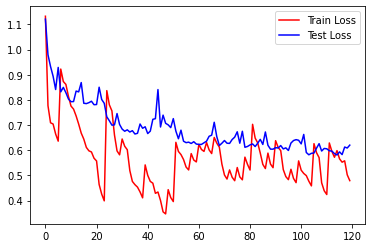

In [ ]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [ ]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_miou'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['miou'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

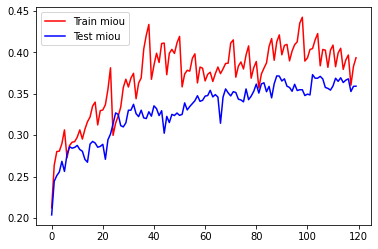

In [ ]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train miou': 'r', 'Test miou':'b'})
plt.show()

In [ ]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_accuracy'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['accuracy'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

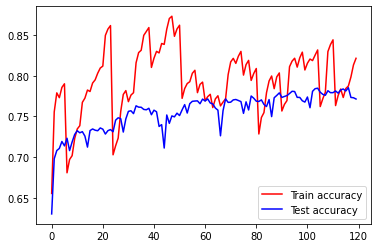

In [ ]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train accuracy': 'r', 'Test accuracy':'b'})
plt.show()

In [ ]:
dependencies = {
    'miou': miou
}
from keras.models import load_model
model = load_model('Final_Unet.hdf5', custom_objects=dependencies)